## Logistic Regression - ROI Features

In [128]:
import numpy as np
import pickle
import scipy as scp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import NotFittedError
from matplotlib import pyplot as plt

In [129]:
with open('HCP_movie_watching.pkl','rb') as f:
    TS = pickle.load(f)

index = np.arange(176)
np.random.shuffle(index)
testIndex = index[:76]

In [130]:
def splitData(tList):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    for row in tList:
        if row[-1] in testIndex:
            X_test.append(row[:-2])
            y_test.append(row[-2])
        else:
            X_train.append(row[:-2])
            y_train.append(row[-2])

    X_train = np.array(X_train).astype(float)
    X_train = (X_train - np.mean(X_train)) / np.std(X_train)

    X_test = np.array(X_test).astype(float)
    X_test = (X_test - np.mean(X_test)) / np.std(X_test)
    
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    return X_train, X_test, y_train, y_test
    

In [131]:
performAcc = []
model = LogisticRegression(max_iter = 1000)
# permTestAcc = []
# Run log reg for first 90 time points/seconds
for k in range(90):

    # Timepoint - 2d array
    # Row: (subject, clip) combination
    # Column: ROIs at time point, movie clip, participant number
    #   - ROIs: features for model
    #   - movie clip: label
    #   - participant number: to split into test/train sets
    timepoints = []     
    for key, val in TS.items():
        if val.shape[-2] > k:   # Account for clips with less than 90 time points
            if key == 'testretest':
                for i in range(val.shape[0]):
                    for j in range(val.shape[-3]):
                        subj = []       # Create new row
                        for l in range(val.shape[-1]):
                            subj.append(val[i][j][k][l])
                        subj.append(key)    # Add movie
                        subj.append(j)      # Add participant number
                        timepoints.append(subj)     # Add new row to array
            else:
                for j in range(val.shape[-3]):
                    subj = []
                    for l in range(val.shape[-1]):
                        subj.append(val[j][k][l])
                    subj.append(key)
                    subj.append(j)
                    timepoints.append(subj)
        
    X_train, X_test, y_train, y_test = splitData(timepoints)

    model.fit(X_train, y_train)
    
    acc = model.score(X_test, y_test)
    performAcc.append(acc)

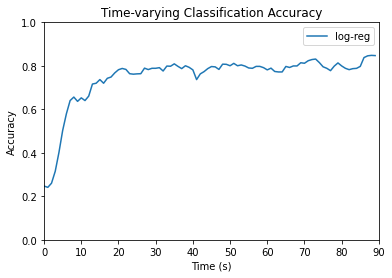

In [132]:
xAx = [i for i in range(0,90)]
plt.plot(xAx, performAcc, label="log-reg")
plt.xlabel("Time (s)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.xlim(0,90)
plt.title("Time-varying Classification Accuracy")
plt.legend()
plt.show()